<div style="text-align:center;color:#888888;"><h2> IMP 5001 - Introduction to Medical Informatics </h2></div>
<div style="text-align:center;"><h1> Scikit-Learn Exercises</h1></div>

<div style="color:#999999;text-align:right;">Ref: <a href="https://sebastianraschka.com">Python Machine Learning 3rd Edition</a> &ensp; <a href="https://github.com/rasbt/python-machine-learning-book-3rd-edition">Code Repository</a> &ensp; <a href="https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/LICENSE.txt">MIT License</a></div>

In [1]:
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [2]:
from IPython.display import Image
%matplotlib inline

## Visualize decision boundary

In [3]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # numpy.ravel(a, order='C'): Return a contiguous flattened array    
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

### <span style="color:red">Exercise 1: Wine Classification
    
Please use `Wine.csv` in the folder to practice wine classification:


In [4]:
#Loading Data

import pandas as pd

df=pd.read_csv('Wine.csv',header=None)

df.columns = [  'grade'
                ,'alcohol'
             	,'malicAcid'
             	,'ash'
            	,'ashalcalinity'
             	,'magnesium'
            	,'totalPhenols'
             	,'flavanoids'
             	,'nonFlavanoidPhenols'
             	,'proanthocyanins'
            	,'colorIntensity'
             	,'hue'
             	,'od280_od315'
             	,'proline'
                ]

df.head()

,grade,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


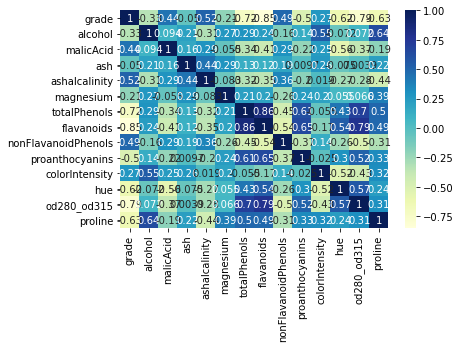

In [5]:
import seaborn as sns
corr = df[df.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot = True)

In [ ]:
##### TO DO #####

from sklearn.preprocessing import LabelEncoder

# y: Label encoding 

# X: Refer to the heatmap to extract two of the correlated features: alcohol and flavanoids


In [ ]:
##### TO DO #####

from sklearn.model_selection import train_test_split
#Split into training and testing sets (test_size=0.3)




In [ ]:
##### TO DO #####

from sklearn.preprocessing import StandardScaler
#Standardizing the features




In [ ]:
##### TO DO #####

# Training
from sklearn.linear_model import SGDClassifier

#ppn = SGDClassifier(loss='perceptron')
#lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')



In [ ]:
##### TO DO #####

from sklearn.metrics import accuracy_score
# Testing (print out the accuracy)





In [ ]:
##### TO DO #####

import numpy as np
#Visualize decision boundary (you can use the function: plot_decision_regions)



### <span style="color:red">Exercise 2: Parameter tuning for SVC


In [6]:
# An alternative way to download iris dataset from sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

iris = datasets.load_iris()
X = iris.data[:, :2] 
# The 0th column represents the sepal length
# The 1st column represents the sepal width
# The 2nd column represents the petal length
# The 3rd column represents the petal width of the flower examples.
y = iris.target # 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [7]:
def plotSVC(title):
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = (x_max / x_min)/100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    plt.subplot(1, 1, 1)
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.xlim(xx.min(), xx.max())
    plt.title(title)
    plt.show()

In [ ]:
##### TO DO #####

#Visualize decision boundary:

kernels = ["linear", "rbf", "poly"]


In [ ]:
##### TO DO #####

#Visualize decision boundary:

gammas = [0.1, 1, 10, 100]



In [ ]:
##### TO DO #####

#Visualize decision boundary:

c = [0.1, 1, 10, 100, 1000]
